# MODS205
# Digital Finance

# project 

## Servane Desvignes et El arji Hamza

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mplfinance as mpf
from scipy import stats
from scipy.stats import norm
import plotly.graph_objects as go
from plotly.subplots import make_subplots


## Data

- "^FCHI": Represents the CAC40 index.  
- "^IRX": Represents the 5-week interest rate from the US Treasury.  
- "FP.PA": Represents the stock of TotalEnergies SE.  
- "VIV.PA": Represents the stock of Vivendi SA.  


## PART 3 


## 3.1. Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.  

In [2]:
# Read and process the ^FCHI.csv file
df_FCHI = pd.read_csv('^FCHI.csv')
df_FCHI['Date'] = pd.to_datetime(df_FCHI['Date'])
df_FCHI.sort_values('Date', inplace=True)
df_FCHI.rename(columns=lambda x: x + '_FCHI' if x != 'Date' else x, inplace=True)
print("FCHI DataFrame:")
print(df_FCHI.head())

# Read and process the ^IRX.csv file
df_IRX = pd.read_csv('^IRX.csv')
df_IRX['Date'] = pd.to_datetime(df_IRX['Date'])
df_IRX.sort_values('Date', inplace=True)
df_IRX.rename(columns=lambda x: x + '_IRX' if x != 'Date' else x, inplace=True)
print("\nIRX DataFrame:")
print(df_IRX.head())

# Read and process the FP.PA.csv file
df_FP = pd.read_csv('FP.PA.csv')
df_FP['Date'] = pd.to_datetime(df_FP['Date'])
df_FP.sort_values('Date', inplace=True)
df_FP.rename(columns=lambda x: x + '_FP' if x != 'Date' else x, inplace=True)
print("\nFP DataFrame:")
print(df_FP.head())

# Read and process the VIV.PA.csv file
df_VIV = pd.read_csv('VIV.PA.csv')
df_VIV['Date'] = pd.to_datetime(df_VIV['Date'])
df_VIV.sort_values('Date', inplace=True)
df_VIV.rename(columns=lambda x: x + '_VIV' if x != 'Date' else x, inplace=True)
print("\nVIV DataFrame:")
print(df_VIV.head())




FCHI DataFrame:
        Date    Open_FCHI    High_FCHI     Low_FCHI   Close_FCHI  \
0 2017-10-24  5377.859863  5413.029785  5377.859863  5394.799805   
1 2017-10-25  5399.609863  5416.540039  5364.160156  5374.890137   
2 2017-10-26  5383.439941  5459.609863  5375.259766  5455.399902   
3 2017-10-27  5470.339844  5513.529785  5470.240234  5494.129883   
4 2017-10-30  5488.330078  5507.560059  5487.290039  5493.629883   

   Adj Close_FCHI  Volume_FCHI  
0     5394.799805     74560600  
1     5374.890137     80466800  
2     5455.399902     90950700  
3     5494.129883     95585200  
4     5493.629883     67428800  

IRX DataFrame:
        Date  Open_IRX  High_IRX  Low_IRX  Close_IRX  Adj Close_IRX  \
0 2017-10-24     1.098     1.098    1.098      1.098          1.098   
1 2017-10-25     1.095     1.098    1.080      1.083          1.083   
2 2017-10-26     1.080     1.083    1.075      1.080          1.080   
3 2017-10-27     1.075     1.075    1.073      1.073          1.073   
4 2017

In [3]:
# Merge all DataFrames on the 'Date' column
merged_df = pd.merge(df_FCHI, df_IRX, on='Date', how='inner')
merged_df = pd.merge(merged_df, df_FP, on='Date', how='inner')
merged_df = pd.merge(merged_df, df_VIV, on='Date', how='inner')

# Sort the merged DataFrame by the 'Date' index
merged_df.sort_index(inplace=True)

# Handle missing values by filling them with the previous valid value
merged_df.fillna(method='ffill', inplace=True)

# Display the first few rows of the merged and sorted DataFrame
print("Merged and sorted DataFrame:")
print(merged_df.head())

# Save the merged DataFrame to a CSV file
#merged_df.to_csv('merged_data.csv', index=False)

Merged and sorted DataFrame:
        Date    Open_FCHI    High_FCHI     Low_FCHI   Close_FCHI  \
0 2017-10-24  5377.859863  5413.029785  5377.859863  5394.799805   
1 2017-10-25  5399.609863  5416.540039  5364.160156  5374.890137   
2 2017-10-26  5383.439941  5459.609863  5375.259766  5455.399902   
3 2017-10-27  5470.339844  5513.529785  5470.240234  5494.129883   
4 2017-10-30  5488.330078  5507.560059  5487.290039  5493.629883   

   Adj Close_FCHI  Volume_FCHI  Open_IRX  High_IRX  Low_IRX  ...     Low_FP  \
0     5394.799805     74560600     1.098     1.098    1.098  ...  46.040001   
1     5374.890137     80466800     1.095     1.098    1.080  ...  45.875000   
2     5455.399902     90950700     1.080     1.083    1.075  ...  45.799999   
3     5494.129883     95585200     1.075     1.075    1.073  ...  46.490002   
4     5493.629883     67428800     1.073     1.080    1.073  ...  47.305000   

    Close_FP  Adj Close_FP  Volume_FP   Open_VIV   High_VIV  Low_VIV  \
0  46.355000   

C:\Users\hamza\AppData\Local\Temp\ipykernel_20372\592714918.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


## 3.2. Give a short financial analysis of the two stocks by using relevant concepts of the course.  


In [4]:
# Candlestick Chart for TotalEnergies SE (FP.PA)
fig_fp = go.Figure(data=go.Ohlc(x=df_FP['Date'],
                                 open=df_FP['Open_FP'],
                                 high=df_FP['High_FP'],
                                 low=df_FP['Low_FP'],
                                 close=df_FP['Close_FP']))

fig_fp.update_layout(title='TotalEnergies SE (FP.PA) Candlestick Chart')

# Show the TotalEnergies SE (FP.PA) candlestick chart
fig_fp.show()

# Candlestick Chart for Vivendi SA (VIV.PA)
fig_viv = go.Figure(data=go.Ohlc(x=df_VIV['Date'],
                                  open=df_VIV['Open_VIV'],
                                  high=df_VIV['High_VIV'],
                                  low=df_VIV['Low_VIV'],
                                  close=df_VIV['Close_VIV']))

fig_viv.update_layout(title='Vivendi SA (VIV.PA) Candlestick Chart')

# Show the Vivendi SA (VIV.PA) candlestick chart
fig_viv.show()


Short financial analysis of the two stocks by using relevant concepts of the course.  


In [5]:
# Create subplots with two rows
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add trace for TotalEnergies SE (FP.PA) Adjusted Close price
fig.add_trace(go.Scatter(x=df_FP['Date'], y=df_FP['Adj Close_FP'], name='TotalEnergies SE (FP.PA) Price'), row=1, col=1)

# Add trace for TotalEnergies SE (FP.PA) Volume
fig.add_trace(go.Bar(x=df_FP['Date'], y=df_FP['Volume_FP'], name='TotalEnergies SE (FP.PA) Volume'), row=2, col=1)

# Update y-axis title for the first subplot
fig.update_yaxes(title_text="Price", row=1, col=1)

# Update y-axis title for the second subplot
fig.update_yaxes(title_text="Volume", row=2, col=1)

# Update layout
fig.update_layout(title_text="TotalEnergies SE (FP.PA) Price and Volume")

# Show the figure
fig.show()


In [6]:
# Create subplots with two rows
fig_viv = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add trace for Vivendi SA (VIV.PA) Adjusted Close price
fig_viv.add_trace(go.Scatter(x=df_VIV['Date'], y=df_VIV['Adj Close_VIV'], name='Vivendi SA (VIV.PA) Price'), row=1, col=1)

# Add trace for Vivendi SA (VIV.PA) Volume
fig_viv.add_trace(go.Bar(x=df_VIV['Date'], y=df_VIV['Volume_VIV'], name='Vivendi SA (VIV.PA) Volume'), row=2, col=1)

# Update y-axis title for the first subplot
fig_viv.update_yaxes(title_text="Price", row=1, col=1)

# Update y-axis title for the second subplot
fig_viv.update_yaxes(title_text="Volume", row=2, col=1)

# Update layout
fig_viv.update_layout(title_text="Vivendi SA (VIV.PA) Price and Volume")

# Show the figure
fig_viv.show()


In [7]:
# Calculate statistics for Close prices
close_stats_FP = df_FP['Close_FP'].describe()
close_stats_VIV = df_VIV['Close_VIV'].describe()

# Calculate statistics for Adjusted Close prices
adj_close_stats_FP = df_FP['Adj Close_FP'].describe()
adj_close_stats_VIV = df_VIV['Adj Close_VIV'].describe()

# Display the statistics
print("TotalEnergies SE (FP.PA) Close Price Statistics:")
print(close_stats_FP)
print("\nTotalEnergies SE (FP.PA) Adjusted Close Price Statistics:")
print(adj_close_stats_FP)

print("\nVivendi SA (VIV.PA) Close Price Statistics:")
print(close_stats_VIV)
print("\nVivendi SA (VIV.PA) Adjusted Close Price Statistics:")
print(adj_close_stats_VIV)

TotalEnergies SE (FP.PA) Close Price Statistics:
count    255.000000
mean      50.325392
std        3.372364
min       43.869999
25%       47.267499
50%       51.060001
75%       53.209999
max       56.369999
Name: Close_FP, dtype: float64

TotalEnergies SE (FP.PA) Adjusted Close Price Statistics:
count    255.000000
mean      49.121968
std        3.930895
min       42.301926
25%       45.166476
50%       49.970135
75%       52.572029
max       56.369999
Name: Adj Close_FP, dtype: float64

Vivendi SA (VIV.PA) Close Price Statistics:
count    255.000000
mean      21.917686
std        0.883395
min       20.350000
25%       21.260000
50%       21.750000
75%       22.505000
max       24.840000
Name: Close_VIV, dtype: float64

Vivendi SA (VIV.PA) Adjusted Close Price Statistics:
count    255.000000
mean      21.696476
std        0.874125
min       19.926237
25%       21.011561
50%       21.634899
75%       22.273130
max       24.322739
Name: Adj Close_VIV, dtype: float64


# Short Financial Analysis of FP.PA and VIV.PA

To visualize our stock to provide a first analysis we use two different representations: 
1) a line chart. Time is represented along the horizontal axis and price is represented along the vertical axis. Since is a daily chart we display the price at the end of the day, the closing price. In our case we don't use a line to represent price but a vertical bar. This bar provides additional details about price movement during a single trading period: the left tick is the opening price, the right tick is the closing price and the top of the bar is the highest price traded while the bottom is the lowest. 

2) line chart + bar chart. This is the same configuration as the previous one with the difference that we add the trading volume on the secondary y axis (right side).
    
In our case the time-frame goes from 2017/10/24 to 2018/10/23. It covers a trading period of one year but due to missing values we have 253 data.



Giving a first look at the chart we immediately notice that both stocks's value have different evolution during this time-frame. 
On the one hand, Total's value was $46,045$ at the beginning and $51,88$ after one year. On the ohter hand,Vivendi's value was $20,47$ at the beginning and $21,4$ at the end. Then, the first stock won $+12,69\%$ and the second  $4,54\%$. They both have a positive return.

Looking at the chart with trading volume we can notice that peaks of trading volume do not correspond necesserly to the largest drop in price, meaning that the market is not extremely volatile.

Analyzing trading volume is fundamental too to understand in which direction the market is going. Volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy. When prices fall on increasing volume, the trend is gathering strength to the downside. This is what happened in both cases.



To conclude, thanks to the candlestick, we can see that there is a fairly strong resistance line for TotalEnergie.

## 3.3. Compute the return for both stocks and for the CAC40 index. Comment on your results. 
 


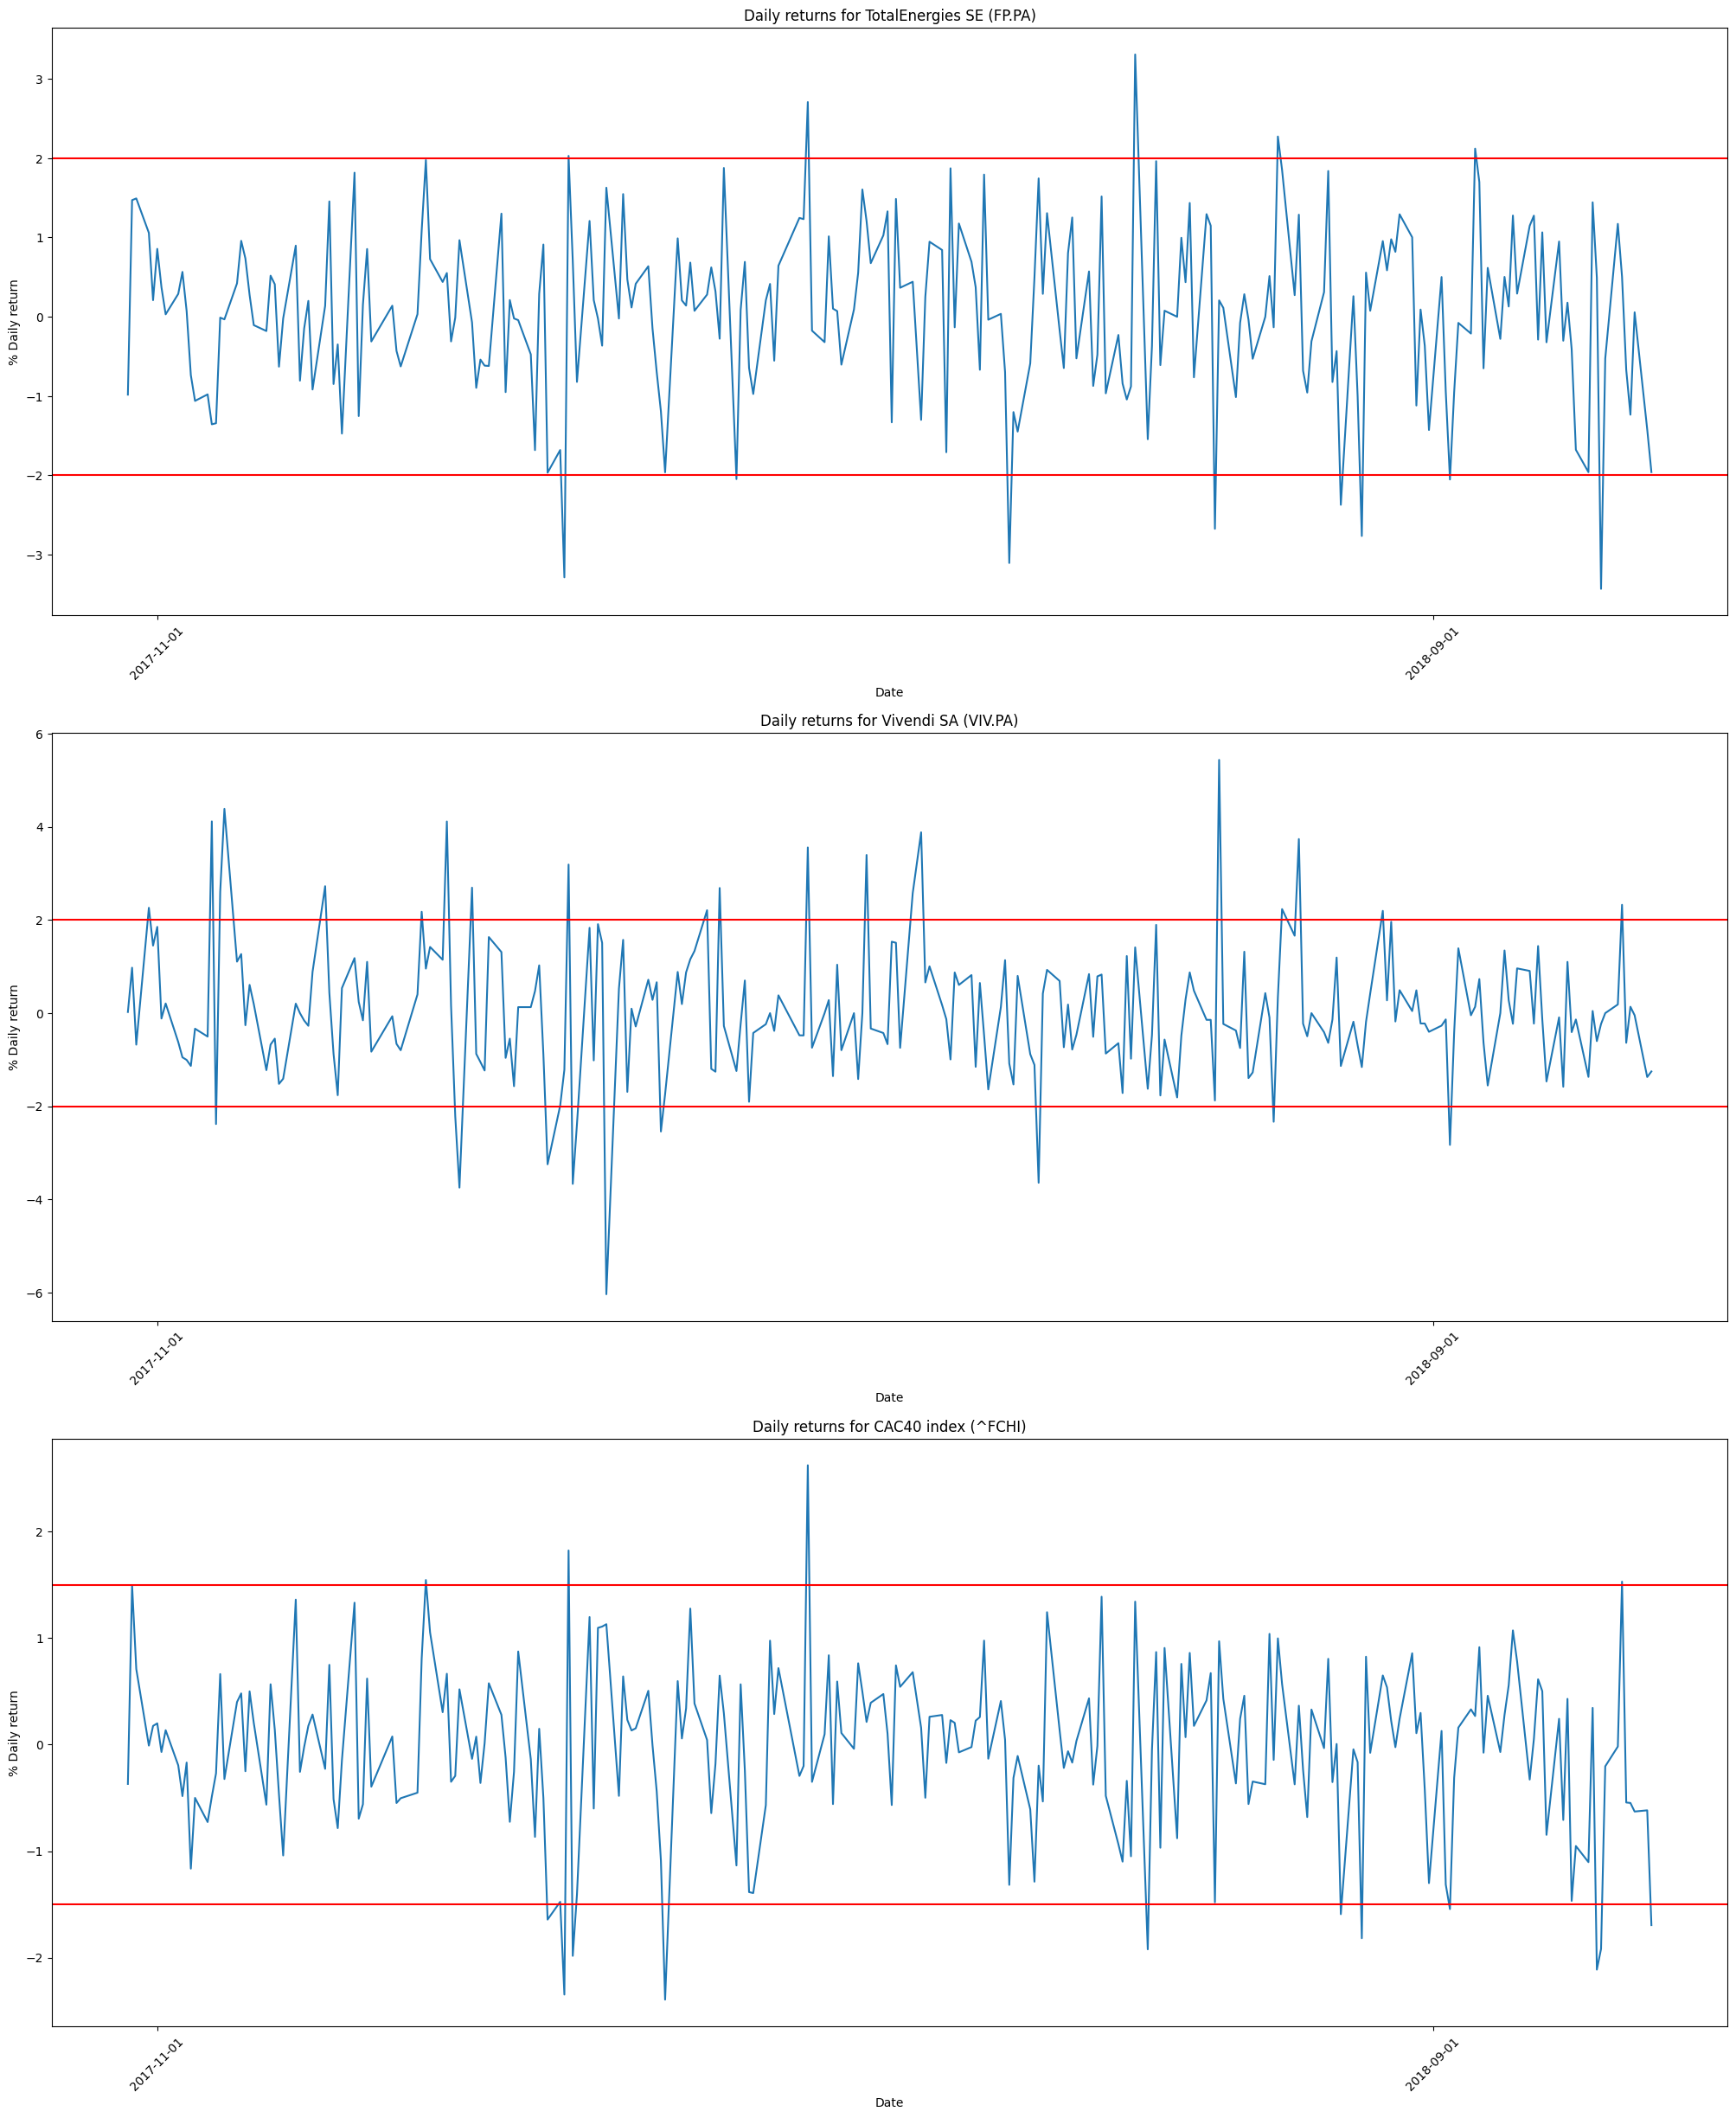

In [8]:
#df_FP['Adj Close_FP']: Represents TotalEnergies SE (FP.PA) adjusted closing prices, adjusted for corporate actions like stock splits and dividends. 
# df_FP['Adj Close_FP'].shift(1): Represents the adjusted closing prices shifted one day up, giving the previous day's adjusted closing prices.
# (df_FP['Adj Close_FP'] / df_FP['Adj Close_FP'].shift(1)): Calculates the daily growth rate of adjusted closing prices, indicating daily price change.
# ((df_FP['Adj Close_FP'] / df_FP['Adj Close_FP'].shift(1)) - 1): Subtracts 1 from the daily growth rate to get the daily return as a percentage.


# Calculate the daily returns for TotalEnergies SE (FP.PA), Vivendi SA (VIV.PA), and the CAC40 index (^FCHI)
df_FP['daily_return'] = (df_FP['Adj Close_FP'] / df_FP['Adj Close_FP'].shift(1)) - 1
df_VIV['daily_return'] = (df_VIV['Adj Close_VIV'] / df_VIV['Adj Close_VIV'].shift(1)) - 1
df_FCHI['daily_return'] = (df_FCHI['Adj Close_FCHI'] / df_FCHI['Adj Close_FCHI'].shift(1)) - 1
df_IRX['daily_return'] = (df_IRX['Adj Close_IRX'] / df_IRX['Adj Close_IRX'].shift(1)) - 1

# Plotting
fig, ax = plt.subplots(3, figsize=(25, 30))

# Plot daily returns for TotalEnergies SE (FP.PA)
ax[0].plot(df_FP['Date'], df_FP['daily_return'] * 100)
ax[0].axhline(y=2, color='r', linestyle='-')
ax[0].axhline(y=-2, color='r', linestyle='-')
ax[0].set(xlabel="Date", ylabel="% Daily return", title="Daily returns for TotalEnergies SE (FP.PA)")
ax[0].set_xticks(ax[0].get_xticks()[::5])
plt.setp(ax[0].get_xticklabels(), rotation=45)

# Plot daily returns for Vivendi SA (VIV.PA)
ax[1].plot(df_VIV['Date'], df_VIV['daily_return'] * 100)
ax[1].axhline(y=2, color='r', linestyle='-')
ax[1].axhline(y=-2, color='r', linestyle='-')
ax[1].set(xlabel="Date", ylabel="% Daily return", title="Daily returns for Vivendi SA (VIV.PA)")
ax[1].set_xticks(ax[1].get_xticks()[::5])
plt.setp(ax[1].get_xticklabels(), rotation=45)

# Plot daily returns for CAC40 index (^FCHI)
ax[2].plot(df_FCHI['Date'], df_FCHI['daily_return'] * 100)
ax[2].axhline(y=1.5, color='r', linestyle='-')
ax[2].axhline(y=-1.5, color='r', linestyle='-')
ax[2].set(xlabel="Date", ylabel="% Daily return", title="Daily returns for CAC40 index (^FCHI)")
ax[2].set_xticks(ax[2].get_xticks()[::5])
plt.setp(ax[2].get_xticklabels(), rotation=45)

plt.show()


Looking at the daily returns of the two stocks and the cac40 index we can conclude that:
- first and second stock show similar trend. They're quite volatile, returns can move from $ +/- 2\%$ on any given day.
- the first stock has the lowest return in percentage, it is approximately $3\%$ while the second stock highest return is approximatively $6\%$. It is interesting to see that they had their peaks on approximately the same week.
- the cac40 index has a slightly different trend with returns that go, most of the times, from $+/- 1.5\%$. Its highest return is approximately $2.5\%$. It has two negative peak of approximately $-2.5\%$. It's interesting to see that both cac40 index and Total have their negatice peaks of return on approximately the same week.


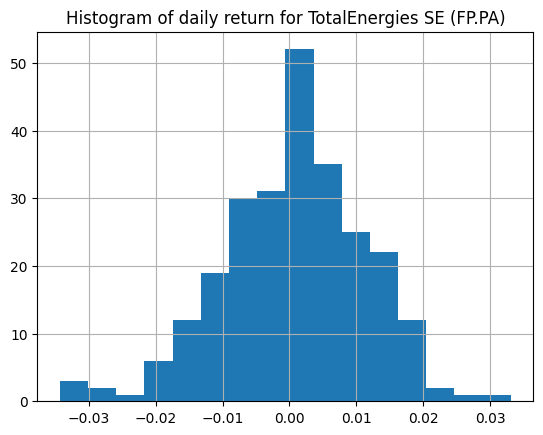

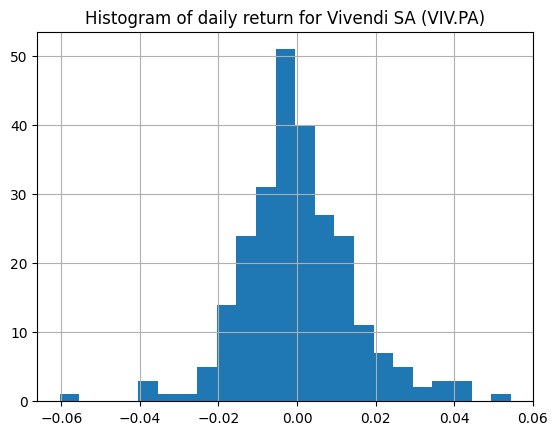

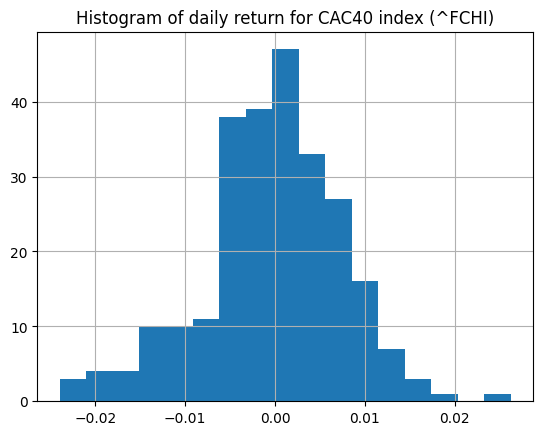

In [9]:
# Plotting histograms
plt.figure(1)
plt.title("Histogram of daily return for TotalEnergies SE (FP.PA)")
df_FP["daily_return"].hist(bins="auto")

plt.figure(2)
plt.title("Histogram of daily return for Vivendi SA (VIV.PA)")
df_VIV["daily_return"].hist(bins="auto")

plt.figure(3)
plt.title("Histogram of daily return for CAC40 index (^FCHI)")
df_FCHI["daily_return"].hist(bins="auto")

plt.show()

This gives an impression of how volatile the portfolio is. The more data is centered around 0.0, the less volatile and risky.

## 3.4. Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3. Plot the histograms and comment on your results.


In [10]:
# Compute kurtosis and skewness for TotalEnergies SE (FP.PA) daily returns
kurtosis_FP = df_FP['daily_return'].kurtosis()
skewness_FP = df_FP['daily_return'].skew()

# Compute kurtosis and skewness for Vivendi SA (VIV.PA) daily returns
kurtosis_VIV = df_VIV['daily_return'].kurtosis()
skewness_VIV = df_VIV['daily_return'].skew()

# Compute kurtosis and skewness for CAC40 index (^FCHI) daily returns
kurtosis_FCHI = df_FCHI['daily_return'].kurtosis()
skewness_FCHI = df_FCHI['daily_return'].skew()

# Print the computed coefficients of kurtosis and skewness
print("TotalEnergies SE (FP.PA) - Kurtosis:", kurtosis_FP)
print("TotalEnergies SE (FP.PA) - Skewness:", skewness_FP)
print("\nVivendi SA (VIV.PA) - Kurtosis:", kurtosis_VIV)
print("Vivendi SA (VIV.PA) - Skewness:", skewness_VIV)
print("\nCAC40 Index (^FCHI) - Kurtosis:", kurtosis_FCHI)
print("CAC40 Index (^FCHI) - Skewness:", skewness_FCHI)


TotalEnergies SE (FP.PA) - Kurtosis: 0.6174091639411285
TotalEnergies SE (FP.PA) - Skewness: -0.3184310308685876

Vivendi SA (VIV.PA) - Kurtosis: 2.191023893457978
Vivendi SA (VIV.PA) - Skewness: 0.2613789755277031

CAC40 Index (^FCHI) - Kurtosis: 0.739019620732229
CAC40 Index (^FCHI) - Skewness: -0.328291738912062


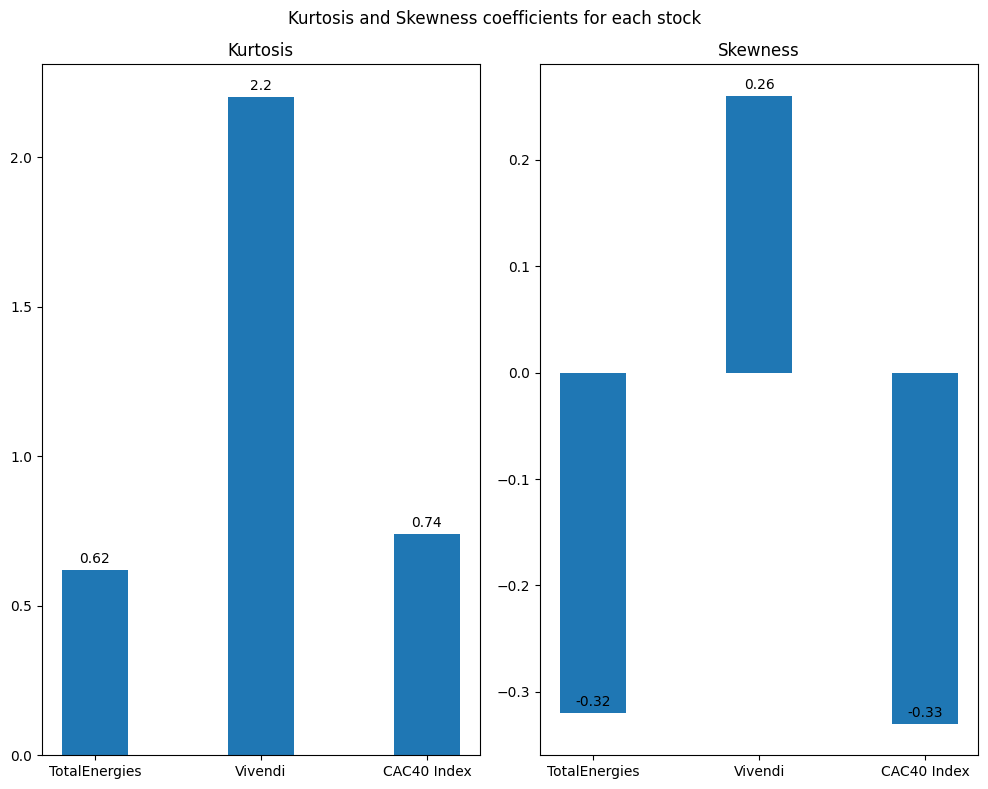

In [11]:
# Sample data for demonstration
stocks = ['TotalEnergies', 'Vivendi', 'CAC40 Index']
kurtosis = [0.62, 2.2, 0.74]  
skewness = [-0.32, 0.26, -0.33]  

fig, ax = plt.subplots(1, 2, figsize=(10,8))

plt.suptitle("Kurtosis and Skewness coefficients for each stock")
ax[0].set_title('Kurtosis')
bar = ax[0].bar(stocks, kurtosis, width=0.4)
for rect in bar:
    height = rect.get_height()
    ax[0].annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

ax[1].set_title("Skewness")
bar1 = ax[1].bar(stocks, skewness, width=0.4)
for rect in bar1:
    height = rect.get_height()
    ax[1].annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

plt.tight_layout()
plt.show()


Kurtosis coefficient is a statistical measure which helps us to better understand the behaviours of extreme values in our series in both the tails. Large values of kurtosis correspond to distribution with tail data that exceed the tail of a normal distribution (five or more std from the mean)  while small values exhibit data that are generally less extreme than tail data of a normal distribution. In our case only the second stock presents very high values of kurtosis (compared to the others) and so investor can expect occasional extreme returns (either positive or negative). The kurtosis of CAC40 and the second stock are indeed a small value which means that investors won't experience occasional extreme returns. That it is weird for TotalEnergies regarding its candlestick.

Skeweness coefficient is a statistical measure which helps us to judge the distortion or asymmetry with respect to symmetrical bell curve. Negative skew refers to a longer or fatter tail on the left side of the distribution, while positive skew refers to a longer or fatter tail on the right. In our case, we can see that Vivendi has a positive skeweness that bring us to expect frequent small losses and a few large gains while for the other (stock2 and CAC40) the opposite. 

Kurtosis analysis and Skeweness are logical.


## 3.5. Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant? 

 


In [12]:
# Compute standard errors for the full period
std_stock1_full = df_FP['daily_return'].sem()
std_stock2_full = df_VIV['daily_return'].sem()
std_cac40_full = df_FCHI['daily_return'].sem()

print("In the full period, the standard errors are:")
print("TotalEnergies: \t" + str(std_stock1_full.round(5)))
print("Vivendi: \t" + str(std_stock2_full.round(5)))
print("CAC40:  \t" + str(std_cac40_full.round(5)))

# Divide into 3 sub-periods
start_date_1 = "2017-10-24"
end_date_1 = "2018-02-23"
start_date_2 = "2018-02-24"
end_date_2 = "2018-06-23"
start_date_3 = "2018-06-24"
end_date_3 = "2018-10-23"

# Slice data for sub-periods
stock1_1 = df_FP[(df_FP['Date'] >= start_date_1) & (df_FP['Date'] <= end_date_1)]
stock1_2 = df_FP[(df_FP['Date'] >= start_date_2) & (df_FP['Date'] <= end_date_2)]
stock1_3 = df_FP[(df_FP['Date'] >= start_date_3) & (df_FP['Date'] <= end_date_3)]

stock2_1 = df_VIV[(df_VIV['Date'] >= start_date_1) & (df_VIV['Date'] <= end_date_1)]
stock2_2 = df_VIV[(df_VIV['Date'] >= start_date_2) & (df_VIV['Date'] <= end_date_2)]
stock2_3 = df_VIV[(df_VIV['Date'] >= start_date_3) & (df_VIV['Date'] <= end_date_3)]

cac40_1 = df_FCHI[(df_FCHI['Date'] >= start_date_1) & (df_FCHI['Date'] <= end_date_1)]
cac40_2 = df_FCHI[(df_FCHI['Date'] >= start_date_2) & (df_FCHI['Date'] <= end_date_2)]
cac40_3 = df_FCHI[(df_FCHI['Date'] >= start_date_3) & (df_FCHI['Date'] <= end_date_3)]

# Compute standard errors for sub-periods
std_stock1_1 = stock1_1['daily_return'].sem()
std_stock1_2 = stock1_2['daily_return'].sem()
std_stock1_3 = stock1_3['daily_return'].sem()

std_stock2_1 = stock2_1['daily_return'].sem()
std_stock2_2 = stock2_2['daily_return'].sem()
std_stock2_3 = stock2_3['daily_return'].sem()

std_cac40_1 = cac40_1['daily_return'].sem()
std_cac40_2 = cac40_2['daily_return'].sem()
std_cac40_3 = cac40_3['daily_return'].sem()

# Print standard errors for sub-periods
print("\nStandard errors of TotalEnergies:")
print(f"From {start_date_1} to {end_date_1}: \t{std_stock1_1.round(5)}")
print(f"From {start_date_2} to {end_date_2}: \t{std_stock1_2.round(5)}")
print(f"From {start_date_3} to {end_date_3}: \t{std_stock1_3.round(5)}")

print("\nStandard errors of Vivendi:")
print(f"From {start_date_1} to {end_date_1}: \t{std_stock2_1.round(5)}")
print(f"From {start_date_2} to {end_date_2}: \t{std_stock2_2.round(5)}")
print(f"From {start_date_3} to {end_date_3}: \t{std_stock2_3.round(5)}")

print("\nStandard errors of CAC40:")
print(f"From {start_date_1} to {end_date_1}: \t{std_cac40_1.round(5)}")
print(f"From {start_date_2} to {end_date_2}: \t{std_cac40_2.round(5)}")
print(f"From {start_date_3} to {end_date_3}: \t{std_cac40_3.round(5)}")


In the full period, the standard errors are:
TotalEnergies: 	0.00067
Vivendi: 	0.00091
CAC40:  	0.00049

Standard errors of TotalEnergies:
From 2017-10-24 to 2018-02-23: 	0.00103
From 2018-02-24 to 2018-06-23: 	0.0012
From 2018-06-24 to 2018-10-23: 	0.00124

Standard errors of Vivendi:
From 2017-10-24 to 2018-02-23: 	0.00189
From 2018-02-24 to 2018-06-23: 	0.00144
From 2018-06-24 to 2018-10-23: 	0.00134

Standard errors of CAC40:
From 2017-10-24 to 2018-02-23: 	0.00084
From 2018-02-24 to 2018-06-23: 	0.00082
From 2018-06-24 to 2018-10-23: 	0.00086


Volatility is a measure that indicates the pricing behavior of a stock and helps estimate the fluctuations that may happen in a short period of time.

In our case, in three different period of times only volatility of CAC40 remains almost constant. 

For what concern Vivendi's volatility is decreasing in each period from $0.00189$ to $0.00134$ so the volatility is not constant. Decreasing volatility often indicates a period of stability or consolidation in the market.

Talking about Total's volatility is increasing. Increasing volatility suggests rising uncertainty and potentially larger price movements in the market.

## 3.6. Compute the correlation between each stock and the CAC40. Comment on your results. 



The correlation coefficient between TotalEnergies and CAC40 index is 0.32


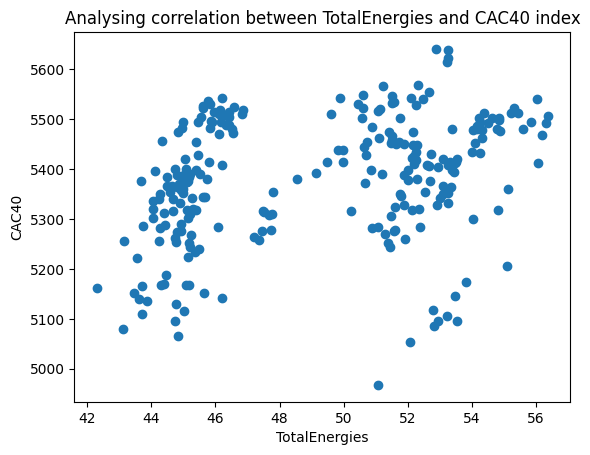

In [13]:
# Plotting
plt.title("Analysing correlation between TotalEnergies and CAC40 index")
plt.xlabel("TotalEnergies")
plt.ylabel("CAC40")

plt.plot(df_FP["Adj Close_FP"], df_FCHI["Adj Close_FCHI"], 'o')

# Calculate correlation coefficient
corr1 = np.corrcoef(df_FP["Adj Close_FP"], df_FCHI["Adj Close_FCHI"])[0][1]
print(f"The correlation coefficient between TotalEnergies and CAC40 index is {corr1:.2f}")

plt.show()

The correlation coefficient between Vivendi and CAC40 index is 0.55


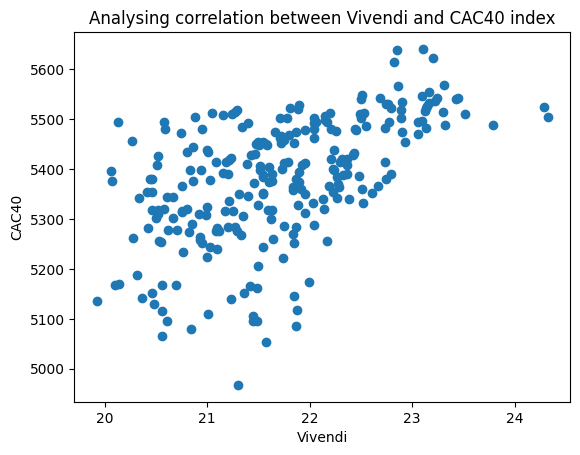

In [14]:
# Plotting
plt.title("Analysing correlation between Vivendi and CAC40 index")
plt.xlabel("Vivendi")
plt.ylabel("CAC40")

plt.plot(df_VIV["Adj Close_VIV"], df_FCHI["Adj Close_FCHI"], 'o')

# Calculate correlation coefficient
corr1 = np.corrcoef(df_VIV["Adj Close_VIV"], df_FCHI["Adj Close_FCHI"])[0][1]
print(f"The correlation coefficient between Vivendi and CAC40 index is {corr1:.2f}")

plt.show()

We plot the Total Adj close price and the cac40 Adj close price on the same graph to get an idea of the type of correlation that exists between the two. Then we do the same for Vivendi.

- The first scatter plot for TotalEnergies shows a grouping of data points that seem to follow a slight upward trend, suggesting a positive correlation. There is some degree of spread in the data points, suggesting that while there might be a positive correlation, it is not very strong. There could be a moderate linear relationship.

- The second scatter plot for Vivendi also shows a spread of data points with an upward trend, which suggests a positive correlation as well. The spread is less pronounced in this scatter plot, implying a stronger correlation than what we might infer from the TotalEnergies plot. 

## 3.7. Compute the returns of a portfolio in which both stocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results. 


A portfolio return is the weighted average of individual assets in the portfolio.

**Formula**: 

Expected daily return of our portfolio $= 0.5 * stock1.dailyReturn + 0.5 * stock2.dailyReturn $

In [15]:
def returnVol(return_1, return_2, weights):
    #calcuating expected return
    exp_ret = (weights[0] * return_1) + (weights[1] * return_2)
    exp_ret = exp_ret.mean()
    
    #calculating covariance from coefficent of correlation    
    corr =  np.corrcoef(return_1, return_2)[0][1]
    std_1 = return_1.std()
    std_2 = return_2.std()
    cov = corr * std_1 * std_2
    
    #Std of portfolio
    std = ((((weights[0] ** 2) * (std_1 ** 2)) + ((weights[1] ** 2) * (std_2 ** 2)) + (2 * weights[0] * weights[1] * cov))**0.5)

    return exp_ret, std

In [16]:
df_FP.dropna(inplace=True)
df_VIV.dropna(inplace=True)
weights = [0.5, 0.5]  # Equal weights for both stocks
portfolio_return, portfolio_volatility = returnVol(df_FP["daily_return"], df_VIV["daily_return"], weights)
print(f"The expected return of our portfolio is {portfolio_return*100:.3f} % with a standard deviation of {portfolio_volatility:.3f}")


The expected return of our portfolio is 0.049 % with a standard deviation of 0.010


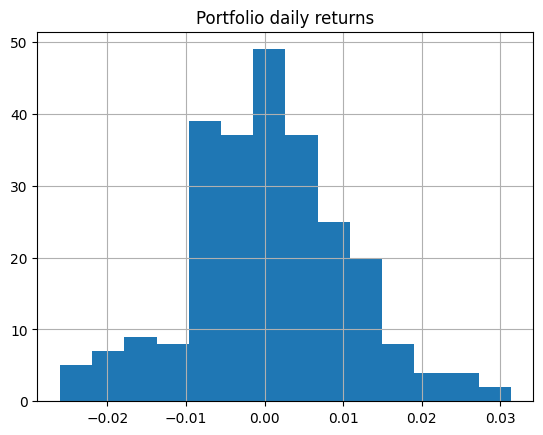

In [17]:
plt.figure(1)
exp_ret = (0.5*df_FP["daily_return"]) + (0.5*df_VIV["daily_return"])
plt.title("Portfolio daily returns")
exp_ret.hist(bins="auto");

The expected return of a portfolio is the anticipated amount of returns that a portfolio may generate, making it the mean (average) of the portfolio's possible return distribution. Standard deviation of a portfolio, on the other hand, measures the amount that the returns deviate from its mean, making it a proxy for the portfolio's risk.
BUT the expected return is usually based on historical data and is therefore not guaranteed.

The average expected return of our portfolio is $0.0049%$ with a standard deviation of $0.010%$.
This means that the probable long-term average return for this type of portfolio is $0.0049\%$ with a variation of $0.010$. Since both stocks have a positive average daily return we expect that the portfolio follow this trend.


## 3.8. Consider a portfolio with one stock and the risk-free interest rate (you can choose the stock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and A=1.5? 


In [26]:
from scipy.optimize import minimize

average_return_FP= df_FP["daily_return"].mean()
average_return_IRX= df_IRX["daily_return"].mean()
var_FP= df_FP["daily_return"].var()
var_IRX= df_IRX["daily_return"].var()

df_FP_cleaned = df_FP["daily_return"].dropna()
df_IRX_cleaned = df_IRX["daily_return"].dropna()
min_length = min(len(df_FP_cleaned), len(df_IRX_cleaned))
df_FP_cleaned = df_FP_cleaned[:min_length]
df_IRX_cleaned = df_IRX_cleaned[:min_length]

# Calculate the correlation coefficient
correlation_stocks = np.corrcoef(df_FP_cleaned, df_IRX_cleaned)[0][1]
correlation_stocks = np.corrcoef(df_FP_cleaned, df_IRX_cleaned)[0][1]

# Expected returns array
expected_returns = np.array([average_return_FP, average_return_IRX])

# Covariance matrix (variances along the diagonal and covariance terms off the diagonal)
covariance_matrix = np.array([[var_FP, correlation_stocks * np.sqrt(var_FP * var_IRX)],
                              [correlation_stocks * np.sqrt(var_FP* var_IRX), var_IRX]])
# The risk aversion coefficient is provided as 1.5
A = 1.5

# Utility function
def utility_function(weights):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    utility = portfolio_return - 0.5 * A * portfolio_std ** 2
    return -utility  # We return the negative utility for minimization

# Constraint: the weights of the assets must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: the weights must be between 0 and 1 (no short-selling or leveraging)
bounds = ((0, 1), (0, 1))

# Initial guess: starting with an equal allocation
initial_weights = np.array([0.5, 0.5])

# Optimization to find the weights that maximize the utility function
result = minimize(utility_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extracting the optimal weights from the optimization result
optimal_weights = result.x

# Print the optimal weights
print("Optimal weights for the assets:", optimal_weights)


Optimal weights for the assets: [0. 1.]


## 3.9. Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component; portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of question 3.7. These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio are inefficient? 



Portfolio 1: 
Expected Return: 	0.0633%
std: 		0.0107

Portfolio 2: 
Expected Return: 	0.0339%
std: 		0.0144

Portfolio 3: 
Expected Return: 	0.049%
std: 		0.01


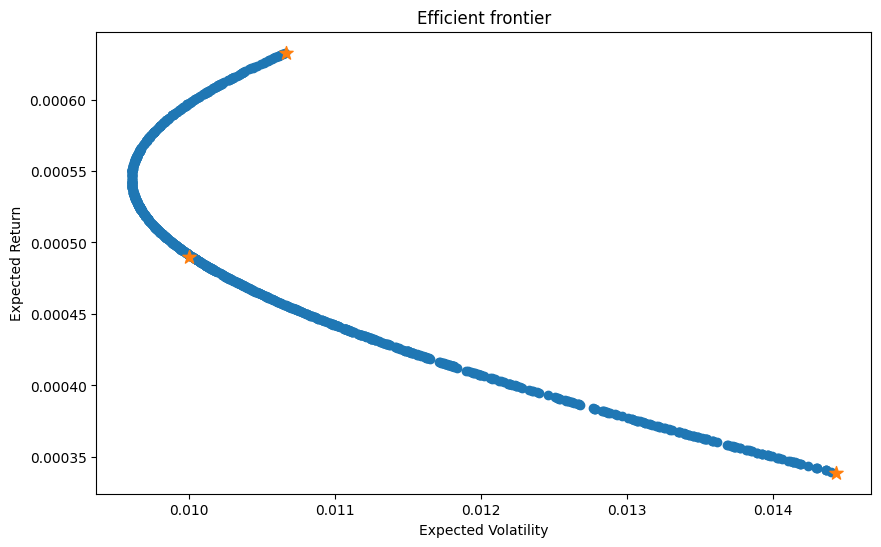

In [19]:
# Portfolio 1: only stock 1 (TotalEnergies SE (FP.PA))
exp_ret_1 = df_FP["daily_return"].mean()
risk_1 = df_FP["daily_return"].std()

# Portfolio 2: only stock 2 (Vivendi SA (VIV.PA))
exp_ret_2 = df_VIV["daily_return"].mean()
risk_2 = df_VIV["daily_return"].std()

# Portfolio 3: calculated from previous question
exp_ret_3, risk_3 = 0.00049, 0.01  
portfolios = {"ret": [exp_ret_1, exp_ret_2, exp_ret_3], "risk": [risk_1, risk_2, risk_3]}

# To draw the efficient frontier, we create 1000 portfolios with different weights of the two assets
portfolio_returns = []
portfolio_vol = []
for _ in range(1000):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    
    exp_ret_t, std_t = returnVol(df_FP["daily_return"], df_VIV["daily_return"], weights)

    portfolio_returns.append(exp_ret_t)
    portfolio_vol.append(std_t)

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_vol, portfolio_returns)
plt.scatter(portfolios["risk"], portfolios["ret"], s=100, marker="*")
plt.title("Efficient frontier")
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

print("Portfolio 1: \nExpected Return: \t" + str(round(exp_ret_1 * 100, 4)) + "%\nstd: \t\t" + str(round(risk_1, 4)))
print("\nPortfolio 2: \nExpected Return: \t" + str(round(exp_ret_2 * 100, 4)) + "%\nstd: \t\t" + str(round(risk_2, 4)))
print("\nPortfolio 3: \nExpected Return: \t" + str(round(exp_ret_3 * 100, 4)) + "%\nstd: \t\t" + str(round(risk_3, 4)))


The Efficient Frontier is a graph with the expected returns on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return. The efficient frontier graphically represents portfolios that maximize returns for the risk assumed. Returns are dependent on the investment combinations that make up the portfolio. Ideally, an investor seeks to fill a portfolio with stocks offering exceptional returns but with a combined standard deviation that is lower than the standard deviations of the individual stocks.

Portfolio to is the inneficient one. Because it has the highest risk and the lowest return.

## 3.10. Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the Sterling ratio. Why are there differences between these ratios?

### Sharpe Ratio:

The Sharpe Ratio is calculated using the formula:

 $\text{SharpeRatio} = \frac{R_p - R_f}{\sigma_p} $

Where:
- $R_p$ is the expected return of the portfolio.
- $R_f$ is the risk-free rate.
- $ \sigma_p $ is the standard deviation of the portfolio returns.

### Sortino Ratio:

The Sortino Ratio is calculated using the formula:

$ \text{SortinoRatio} = \frac{R_p - R_f}{\sigma_d} $

Where:
- $R_p$ is the expected return of the portfolio.
- $T$ is the target rate of return.
- $DR$ is the downside risk.

### Sterling Ratio:

The Sterling Ratio is calculated using the formula:

$\text{SterlingRatio} = \frac{R_p}{AMD + \beta} $

Where:
- $R_p$ is the expected return of the portfolio.
- $AMD $ is the Average Annual Maximum Drawdown.
- $ \beta $ is the benchmark volatility.


In [20]:
#Portfolio of question 3.7
df_FP.dropna(inplace=True)
df_VIV.dropna(inplace=True)
weights = [0.5, 0.5]  # Equal weights for both stocks
portfolio_return, std = returnVol(df_FP["daily_return"], df_VIV["daily_return"], weights)
print(f"The expected return of our portfolio is {portfolio_return*100:.3f} % with a standard deviation of {portfolio_volatility:.3f}")

The expected return of our portfolio is 0.049 % with a standard deviation of 0.010


**Sharpe ratio: what is it**

Sharpe ratio is a performance indicator helps investors understand the return of an investiment compared to its risk. Sharpe ratio is equal to compound annual rate of return minus rate of return on a risk-free investiment divided by the annualized standard deviation.

**How to interpret it?**

The greater the sharpe ratio the greater the risk-adjusted return. We would like to see this number as high as possible. Usually speaking a Sharpe ratio of 1.0 or greater is considered to be good and essentially implies that for every unit of risk you're assuming you're achieving an equal amount of return. In short, the larger the Sharpe ratio the better.

In [21]:
""" sharpe ratio """

df_IRX["daily_return"] = (df_IRX['Adj Close_IRX']/ df_IRX['Adj Close_IRX'].shift(1)) -1

risk_free_rate = df_IRX["daily_return"].mean()

# sharpe ratio 
sharpe_ratio = (portfolio_return - risk_free_rate) / std
print(f"Sharpe ratio is: {sharpe_ratio:.3f}")

Sharpe ratio is: -0.251


**Sortino ratio: what is it**

Sortino ratio is another risk adjusted statistic used to quantify risk to reward. It's very similar to how the Sharpe ratio measures an investment based on its risk, but the Sortino ratio takes into consideration only downside deviations (volatility of negative returns) within the investment as opposed to the standard deviations (volatility of both positive and negative returns) that the Sharpe ratio uses.
The average return refers to the weigthed mean return of all the investments in an individual's portfolio. On the other hand, the expected rate of return, or risk-free rate, is the return on long-term government securities.
It is quite similar to Sharpe ratio but, in the denominator we consider the std of the downside risk. To find the std of downside risks we consider only negative returns. We will not consider those with positive returns as their deviations are zero.

**How to intepret it?**

Similar to the Sharpe ratio, the larger the Sortino, the better. Usually, a Sortino ratio greater than 2 is consider to be good.

In [22]:
""" sortino ratio """

# create a downside return series with the negative returns only :
weights = [0.5 , 0.5]
exp_ret = (weights[0] * df_FP["daily_return"]) + (weights[1] * df_VIV["daily_return"])
downside_returns = exp_ret[exp_ret < 0]
downside_stdev = downside_returns.std()

# sortino ratio
target = risk_free_rate
sortino_ratio = (exp_ret.mean() - target) / downside_stdev

print(f"Sortino ratio is: {sortino_ratio:.3f}")

Sortino ratio is: -0.416


**Sterling Ratio: what is it?**

The Sterling ratio  evaluates an investment's performance by considering both returns and risk, albeit with a distinct focus. While the Sortino ratio emphasizes downside risk, the Sterling ratio incorporates benchmark volatility alongside downside deviation.
By incorporating benchmark volatility, the Sterling ratio provides a broader perspective on an investment's risk-adjusted returns, taking into account its performance relative to a predefined benchmark.

**How to intepret it?**

Similar to the Sortino ratio, a higher Sterling ratio indicates superior risk-adjusted performance. Investors typically consider a Sterling ratio greater than 1 favorable, signifying that the investment's returns surpass the combined impact of both downside risk and benchmark volatility.
The Sterling ratio enables investors to assess an investment's performance relative to a benchmark, offering valuable insights into whether it outperforms or lags behind the broader market.

In [23]:
# Computing exp_ret_avg and benchmark_volatility
weights = [0.5 , 0.5]
exp_ret = (weights[0] * df_FP["daily_return"]) + (weights[1] * df_VIV["daily_return"])
exp_ret_avg = exp_ret.mean()
benchmark_volatility= exp_ret.std()

# now we have to calculate the maximum drawdown of our portfolio using daily returns

# firstly we need the cumulative returns, to sum return we need the log returns
exp_log_ret = np.log(1 + exp_ret)

# we compute the wealth index which is the cumulative stock return over time 
wealth_index = 1000*(1 + exp_log_ret).cumprod()

# we compute the previous peak which is the cumulative maximum of the wealth index
previous_peaks = wealth_index.cummax()

# finally the drawdown is computed using the wealth index and the previous peaks
drawdown = (wealth_index - previous_peaks) / previous_peaks

# drawdown.plot();
dm = drawdown.min()

print(f"The maximum average drawdown is {dm*100:.2f}%")

sterling_ratio = exp_ret_avg /(benchmark_volatility + dm)

print(f"Sterling ratio is: {sterling_ratio:.9f}")



The maximum average drawdown is -12.16%
Sterling ratio is: -0.004358784


**Comments**

As we said a higher Sharpe/Sortino ratio is better than a lower one as it indicates that the portfolio is operating efficiently by not taking on unnecessary risk that is not being rewarded in the form of higher returns. A low, or even negative, Sharpe/Sortino ratio may suggest that the investor is not being rewarded for taking on additional risk.

In our analysis we've obtained negative values for both Sharpe ratio and Sortino ratio. This means the risk-free rate is greater than the portfolio’s return, or the portfolio's return is expected to be negative. In simple, the two stocks underperformed the risk-free rate in the year. However, it is important to look at risk and returns over mutiple years to get a true reflection of a portfolio's risk and return profile.

The Sterling ratio for our portfolio is negative. As a general rule, the greater the ratio's value, the stronger the performance of the investment. While factors such as market volatility and periodicity can influence an ideal value, Sterling ratios above 1 are typically viewed as being a product of sound investing.

In our portfolio all risk-adjusted statistics are below the ideal threshold. We can conlude that this portfolio is not a good investment, taking into the consideration both risks and returns.

## 3.11. Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.
 


In [24]:
# Compute the empirical mean and variance of the portfolio returns
empirical_mean = np.mean(exp_ret)
empirical_var = np.var(exp_ret)

# Compute the 1st percentile of the portfolio returns
empirical_var_1percent = np.percentile(exp_ret, 1)

# Print the results
print(f"Empirical Mean: {empirical_mean:.6f}")
print(f"Empirical Variance: {empirical_var:.6f}")
print(f"Empirical VAR at 1%: {empirical_var_1percent:.6f}")

# Comment on the results
if empirical_var_1percent < empirical_mean:
    print("The 1% VAR is lower than the mean return, indicating a potential downside risk.")
else:
    print("The 1% VAR is higher than the mean return, indicating a relatively low downside risk.")


Empirical Mean: 0.000486
Empirical Variance: 0.000101
Empirical VAR at 1%: -0.022614
The 1% VAR is lower than the mean return, indicating a potential downside risk.


Using the resampling method, VaR would give us more accurate results. We can see that in our case the VaR decrease and the value is $-0.023$.

So, as before, we can say that we are $99\%$ confident that my portfolio will not lose more than $2.3\%$ 

## 3.12. Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results. 

 


In [25]:
import random
#bootstraping 1000 samples from the original dataset
data_resampled = []
for i in range(1000):
    data_resampled.append(random.sample(exp_ret.to_list(), 1))

#calculating mean, std
sim_exp_ret = np.mean(data_resampled)
sim_std = np.std(data_resampled)

#calculating VaR
confidence_level = 0.01
var_99 = norm.ppf(confidence_level, sim_exp_ret, sim_std)

print(f"The VaR at 1% is {var_99:.8f}")

The VaR at 1% is -0.02310209


Using the resampling method, VaR would give us more accurate results. We can see that in our case the VaR decrease and the value is $-0.023$.

So, as before, we can say that we are $99\%$ confident that my portfolio will not lose more than $2.3\%$ 


$\textbf{ ------------------------------------------------------------THE END-----------------------------------------------------------------------------}$
